# 머신러닝
       
       
5주 1강: Visualization Basics
<br/><br/>

숭실대학교<br/>
AI융합학부<br/>
윤진혁<br/>

# Today
- Matplotlb이란 무엇인가
- Line plot
- Scatter plot
- Error bar
- Density plot / Contour plot
- Histogram

# Visualization with Matplotlib

이번 시간에는 Python의 시각화에 대해서 배우겠습니다.
Python에서 쓸 수 있는 다양한 시각화 툴이 있지만, 가장 기본적이고 널리 쓰이는 툴은 Matplotlib입니다.

2002년 John Hunter가 IPython (지금 쓰고 있는 jupyter의 backend) command line에서 MATLAB의 시각화 기능을 구현하기 위해 만들었습니다.
초기 버전은 gnuplot의 wrapper로 시작했는데, 지금은 자체적인 기능을 구현해 독립적으로 작동합니다. 

Matplotlib은 많은 운영체제와 그래픽 백엔드에서 대부분 잘 작동합니다. 즉, 호환성이 좋습니다.

다만 20여년 전 컨셉으로 만들어져서 지금의 현실에는 조금 구식으로 보일 수 있습니다.
예를 들어 R의 ggplot, ggvis같은 것의 인터페이스는 훨씬 편리하고, D3js나 HTML5등의 웹 시각화가 많이 발전했지요.

그래도 Matplotlib은 여전히 강력하고, 대부분의 경우에 잘 작동합니다.

이번시간과 다음 시간에는 Matplotlib과 Matplotlib을 더 강력하게 만들어주는 Seaborn 이라는 두 가지 패키지에 대해서 배울 예정입니다.

하지만 이 이외에도 강력하고 좋은 패키지가 많습니다. 시간 관계로 모두 다루지 못하지만, 필요한 경우 다른 패키지들을 직접 공부해서 다루어 보세요.

## General Matplotlib Tips

일단 Matplotlib을 본격적으로 시작하기 전에, 가벼운 마음으로 Matplotlib의 기본적인 사항들에 대해서 이야기 해 봅시다. 

### Importing Matplotlib

우리가 numpy를 ``np``, pandas ``pd`` 로 줄여서 부르는 것 처럼, 보통 Matplotlib을 import 할 때는 아래의 2가지 단축어를 사용합니다.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt


``plt``는 Matplotlib에서 가장 많이 쓰이는 interface입니다. 이외에도 Object Oriented로 다루는 방법이 있습니다.

### Setting Styles

``plt.style`` 을 활용하면 기본적인 그래프들의 스타일을 고를 수 있습니다. 
예르 들어서 아래와 같이 ``classic`` 스타일을 고르면 classic Matplotlib style의 그림을 그릴 수 있습니다.

In [3]:
plt.style.use('classic')

이 기능은 matplotlib 1.5 이상에서만 작동합니다.

### ``show()`` or No ``show()``? How to Display Your Plots

Matplotlib를 가장 잘 사용하는 방법은 어떤 환경인지에 따라 다릅니다. 

일반적으로는 Python Script, IPython 터미널, IPython 노트북의 세 가지 (+ 기타 wrapper) 케이스에서 사용이 가능합니다. 

#### Plotting from a script

Python Script에서 직접 사용하는 경우에는 `plt.show()`를 필수적으로 사용해야 합니다.
`plt.show()`는 event loop를 시작시키고 현재 그리고 있는 figure object들을 볼 수 있는 interactive window를 열어줍니다. 
아래와 같이 사용하는 것이지요.

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```


그리고 이 스크립트를 command line에서 실행시키면 됩니다.

```bash
$ python myplot.py
```

이 때 열리는 interactive window는 사용하는 시스템의 grahpical backend에 따라 달라집니다.

`plt.show()`는 한 session당 한 번만 사용하는게 좋습니다.
실행이 중첩되는 경우 backend에 따라 문제가 발생할 수 있습니다.

#### Plotting from an IPython shell

IPthon shell에서도 Matplotlib을 사용할 수 있습니다. 
IPython은 Matplotlib을 작동하기 위해서 `%matpotlib` magic command가 있습니다. 

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

이렇게 된다면, ``plt``는 새로운 figure window를 생성하고 새로운 커맨드를 받을 때 마다 그림을 업데이트 해 줍니다. 

때때로 업데이트가 안 되는 경우는 `plt.draw()`를 통해 그림을 다시 그려주면 되고, ``show``를 꼭 사용하지 않아도 됩니다.

#### Plotting from an IPython notebook

지금 강의처럼 IPython notebook (Jupyter notebook)을 사용하는 경우, cell마다 출력 화면에 실행이 종료된 코드에 해당하는 그림을 실행시킬 수 있습니다.

이를 위해서는 2가지의 magic command가 존재합니다. 

- ``%matplotlib notebook`` 은 *interactive* plot을 그려줍니다. 
- ``%matplotlib inline`` 은 랜더링된 *static* images를 그려줍니다. 

강의에서는 주로 ``%matplotlib inline``를 사용합니다.

In [4]:
%matplotlib inline

한 번만 이 커맨드를 실행시켜주면, 동일 세션과 커널에 작동하는 모든 cell들은 이 커맨드의 영향을 받습니다. 

그리고 PNG 이미지로 그림을 그려주게 됩니다. 

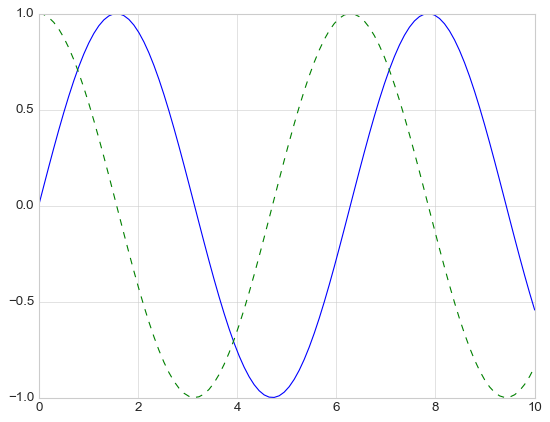

In [37]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()  # 여러 개의 플롯을 포함할 수 있는 컨테이너 역할
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

### Saving Figures to File
``savefig()`` command를 통해서 그림을 파일로 저장할 수 있습니다.

matplotlib은 파일의 확장자를 통해 자동으로 출력될 파일의 형식을 인식해 줍니다.

In [6]:
fig.savefig('my_figure.png')

이 것을 실행하면 현재 디렉토리에 ``my_figure.png`` 파일이 생성됩니다.

In [7]:
!ls my_figure.png

'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


IPython ``Image`` object를 통해 그림이 제대로 그려졌는지 확인해 봅시다.

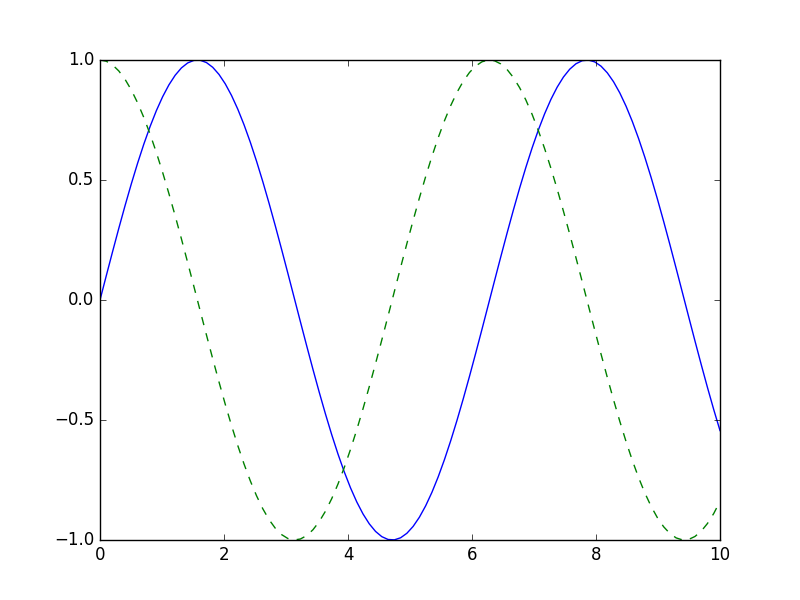

In [8]:
from IPython.display import Image
Image('my_figure.png')

위의 그림과 동일한 그림이 잘 출력되었음을 알 수 있습니다. 

그릴 수 있는 파일의 형식은 아래와 같으며, 버전과 시스템에 따라 조금씩 차이가 납니다. 

ps, eps, pdf, svg등은 벡터 이미지로 출력되고, tif, png등은 비트맵 이미지로 저장됩니다.

In [9]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

그림을 저장하기 위해서는 `plt.show()`가 필요하지는 않습니다. `plt.close()`를 통해서 pyplot interface object를 닫아주는 것은 권장합니다.

## Two Interfaces for the Price of One

위에 말씀드렸듯 matplotlib은 두 가지의 interface가 있습니다.

1. MATLAB style
2. Object oriented.

#### MATLAB-style Interface

이름에서 알 수 있듯 MATplotlib은 MATLAB을 Python으로 대체하기 위해서 만들어졌습니다.

그래서 matlab과 유사한 인터페이스를 사용할 수 있습니다. 

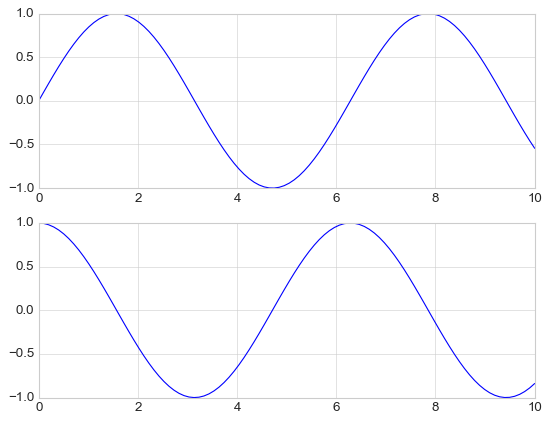

In [48]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))
plt.show()

이 방식은 현재의 figure와 axes를 기억하고 있다, 그 특정 위치를 변경하는 방식입니다. 
``plt.gcf()`` (get current figure) and ``plt.gca()`` (get current axes) 두 가지를 통해 plt가 현재 다루고 있는 figure와 axes를 확인할 수 있습니다. 

이 인터페이스는 꽤 편하고 쓸만하지만, 여러가지 단점이 있습니다.

예를 들어서 두번쨰 패널을 만든 이후에 첫번째 패널을 다시 수정하려면 어떻게 해야할까요? 이 방식으로는 처음부터 전체의 과정을 다시 수행해야 합니다. 

그래서 조금 더 효율적인 다른 방법이 있습니다.

#### Object-oriented interface

Matplotlib은 객체지향 프로그래밍처럼 figure와 axes를 객체로 사용하는 Object Oriented interface를 지원합니다. 

즉, 현재 바꾸고 싶은 위치를 직접 지정해서 그 객체의 맴버 함수와 맴버 변수를 통해서 그림을 조정하는 것이 가능합니다. 

기본적으로 ``Figure`` 와 ``Axes`` 2가지의 obejct가 있습니다. 

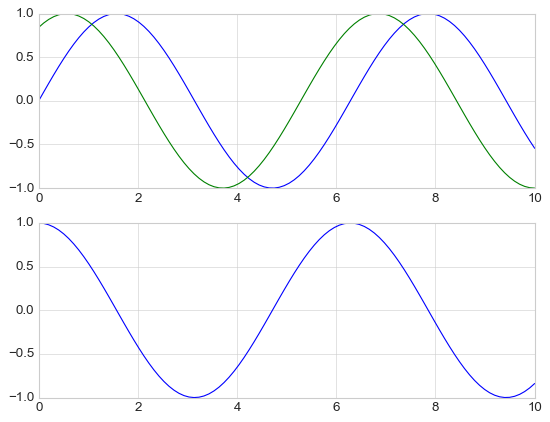

In [49]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)
# fig는 전체 플롯을 관리하는 컨테이너이고
# ax는 개별 subplot을 나타냄

# Call plot() method on the appropriate object  
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))
ax[0].plot(x, np.sin(x + 1))
#plt.show()

간단한 그림을 그릴때는 어느 쪽을 써도 괜찮습니다.

대부분의 간단한 경우에는 ``plt.plot()`` 을 ``ax.plot()``으로 바꾸는 정도로 대부분의 기능이 두 가지 경우에 모두 수행 가능합니다.

하지만 복잡한 그림일수록, object oriented가 훨씬 더 효율적입니다.

# Simple Line Plots

모든 그래프 중 가장 기본적인 그래프는 $y = f(x)$ 형태의 함수를 그리는 것입니다.
일단 이런 간단한 선형 함수를 그려보죠.

시작하기 전에 matplotlib을 import 해 주고, inline으로 선언해 줍시다.

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')  # 그래프 스타일 설정
import numpy as np

<u>Matplotlib의 pyplot은 figure와 axes로 구성</u>되어 있습니다. 

일단 가장 단순하게 1개 figure와 1개 axes로 구성해서 만들어 봅시다.

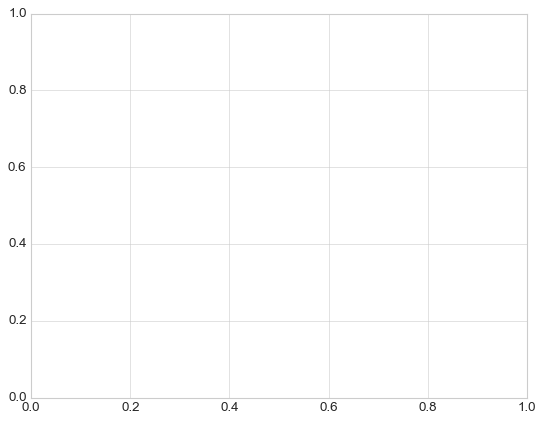

In [13]:
fig = plt.figure()
ax = plt.axes()

`plt.figure`는 axes, text, label, 그리고 기타 graphic들을 모두 포괄하는 한 개의 큰 <u>컨테이너</u>로 생각하시면 됩니다.

`plt.axes`는 저 위에 있는 그래프의 tick, label, 그리고 실제 시각화된 그래프의 element들을 모아놓은 <u>object</u>로 생각하시면 됩니다. 

figure instance는 주로 `fig`라는 변수명을 쓰고, axes instance는 주로 `ax`라는 변수명을 씁니다. 

일단 axes를 만들면, `ax.plot`을 통해서 그래프를 그릴 수 있습니다. 간단한 sin함수를 그려봅시다.

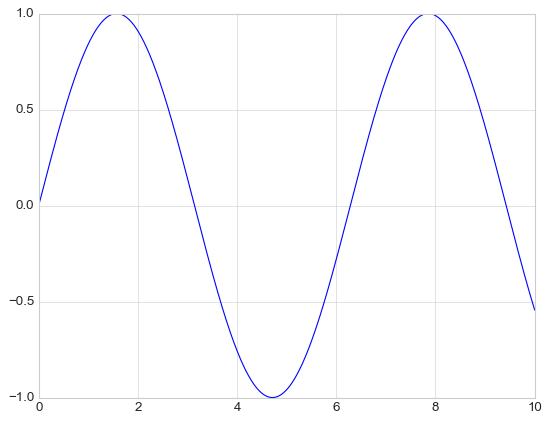

In [60]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000) # 지난주 수업 기억하시죠?
ax.plot(x, np.sin(x))

혹은 지금같은 경우에는 그냥 `plt.plot`을 써도 됩니다. 

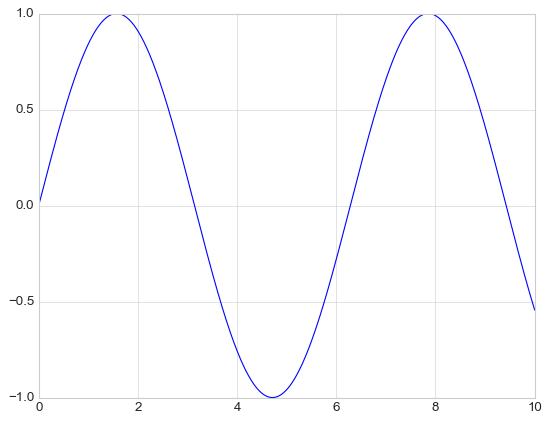

In [15]:
plt.plot(x, np.sin(x))

plot을 여러 번 실행하면, 별도의 명령어가 없다면 같은 axes에 추가적인 선을 그려줍니다.

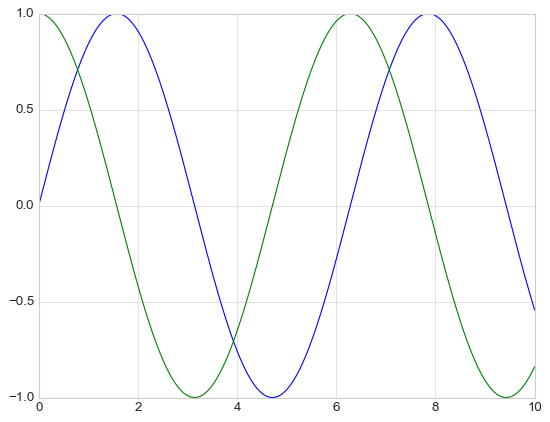

In [73]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

## Adjusting the Plot: Line Colors and Styles

만약 그래프의 색을 원하는 대로 바꾸거나, 선의 스타일을 바꾸고 싶으면 어떻게 해야할까요? `plt.plot()`의 옵션으로 바꿀 수 있습니다. 

먼저 색상의 경우는 ``color`` parameter를 선언해주면 됩니다. 색상을 고르는 방법은 아래와 같이 매우 다양합니다.

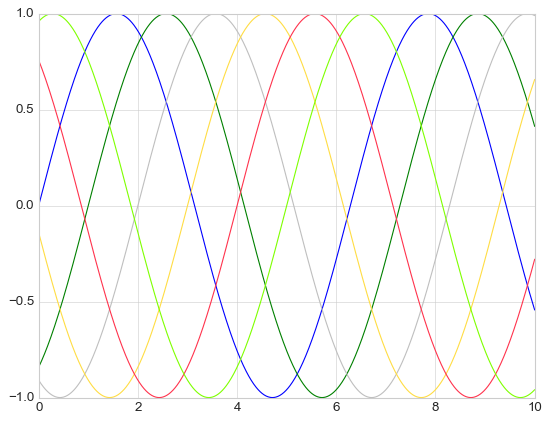

In [17]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse')  # all HTML color names supported

컬러가 지정되지 않으면 matplotlib은 현재 지정된 스타일에 맞추어 자동으로 색상을 지정해 줍니다. 보통 10개 내외의 색상이 스타일마다 지정되어 있어서, 더 많은 선을 그릴 때에는 동일한 색이 여러번 사용될 수 있음에 유의해주세요.

비슷하게 ``linestyle`` 파라미터를 통해서 선 스타일을 바꿀 수 있습니다. 

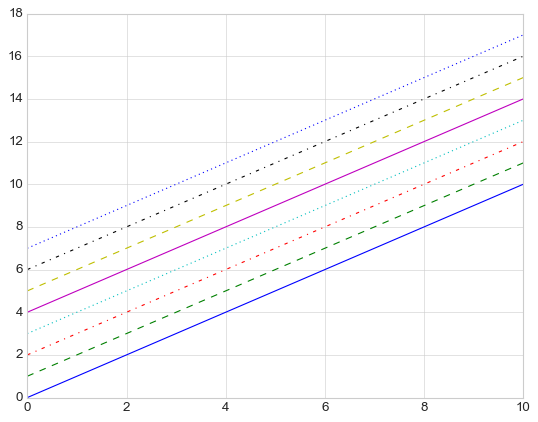

In [76]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted')

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':')  # dotted

``linestyle`` 과 ``color`` 를 합쳐서 한 번에 파라미터로 입력할 수 있습니다. 이 때는 그냥 키워드 없이 아래처럼 입력하면 됩니다.

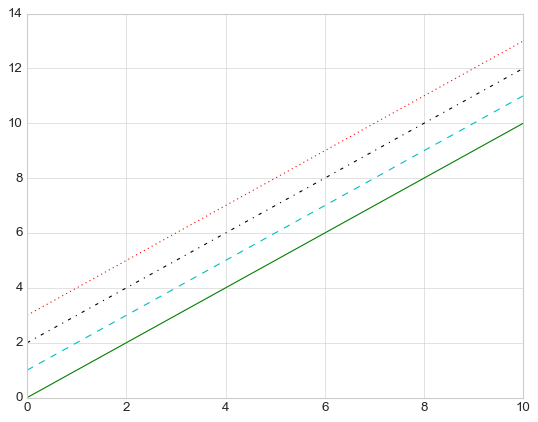

In [19]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

다만 이 경우에는 복잡한 색상을 지정할 수는 없고 RGB와 CYMK의 약자 (r/g/b/c/y/m/k) 만 사용할 수 있습니다. 

## Adjusting the Plot: Axes Limits

x축과 y축의 <u>범위를 조정</u>하고 싶다면 ``plt.xlim()`` 과 ``plt.ylim()`` 함수를 사용하면 됩니다.

(1.5, -1.5)

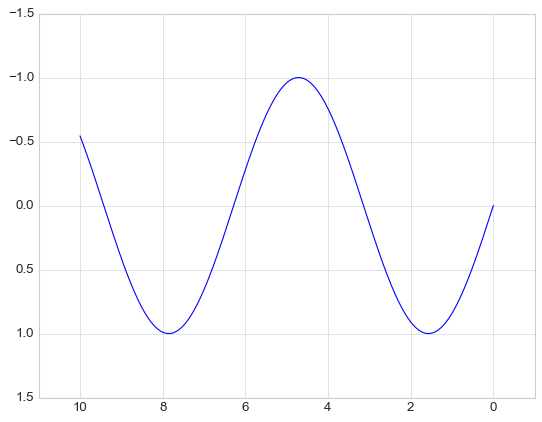

In [78]:
plt.plot(x, np.sin(x))

plt.xlim(11, -1)
plt.ylim(1.5, -1.5)

가끔은 x축이나 y축을 뒤집어서 큰 수부터 쓰고 싶을 때도 있습니다. 그 때에는 parameter를 큰수, 작은수 순서로 써 주면 됩니다.

(1.2, -1.2)

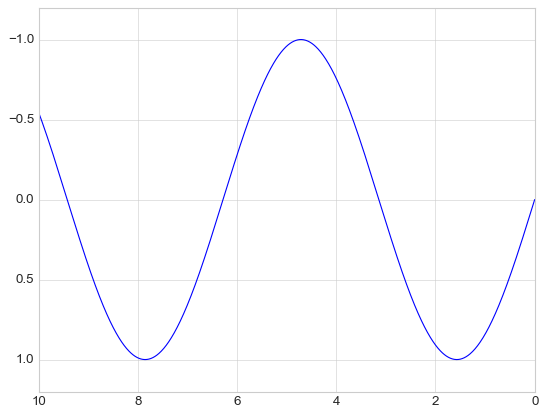

In [81]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2)

``plt.axis()``라는 함수도 존재합니다. ``axes``와 혼동하지 않으셔야 합니다.
``plt.axis()``함수는 한 번에 `x`와 `y`의 범위를 ``[xmin, xmax, ymin, ymax]`` 형태로 지정할 수 있습니다. 

(np.float64(-1.0), np.float64(11.0), np.float64(-1.5), np.float64(1.5))

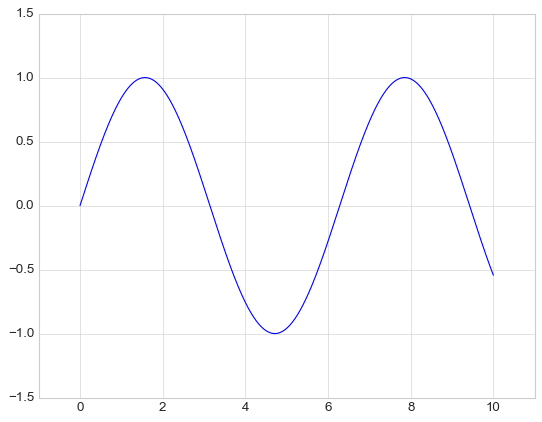

In [22]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5])

``plt.axis()`` 함수는 사실 또다른 기능이 있습니다. 데이터 값에 따라서 어떤 식으로 축을 조정할 지 방식을 지정해 줄 수도 있습니다.

(np.float64(0.0),
 np.float64(10.0),
 np.float64(-0.9999972954811321),
 np.float64(0.9999996994977832))

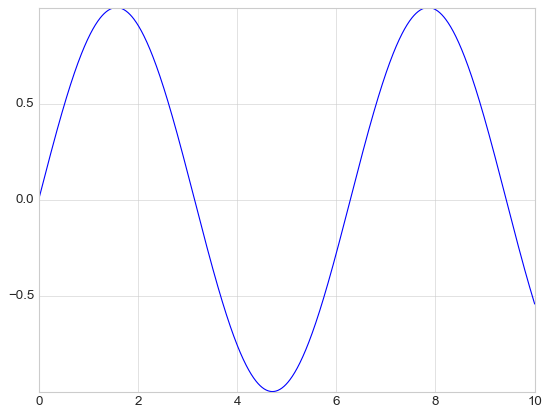

In [23]:
plt.plot(x, np.sin(x))
plt.axis('tight')  # 플롯의 축을 데이터의 범위에 딱 맞게 조정하여 불필요한 여백을 줄임

x축과 y축의 1 단위를 같은 길이로 만들어 주는 옵션도 가능합니다. 

(np.float64(0.0), np.float64(10.0), np.float64(-1.0), np.float64(1.0))

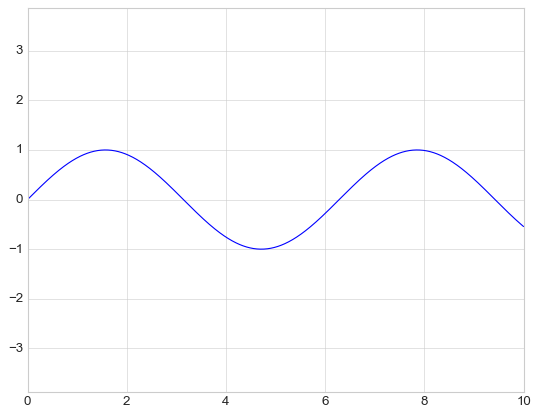

In [83]:
plt.plot(x, np.sin(x))
plt.axis('equal')  # x축과 y축의 스케일을 동일하게 설정

``help(plt.axis)``를 실행해 보시면 docstring에 조금 더 자세한 기능 설명이 있습니다.

## Labeling Plots

그림에 제목을 붙이거나, 아니면 축에 레이블을 붙이고 싶거나, 범례를 쓰는 법을 알아봅시다. 

title과 axis label은 아래처럼 쉽게 지정할 수 있습니다.

Text(0, 0.5, 'sin(x)')

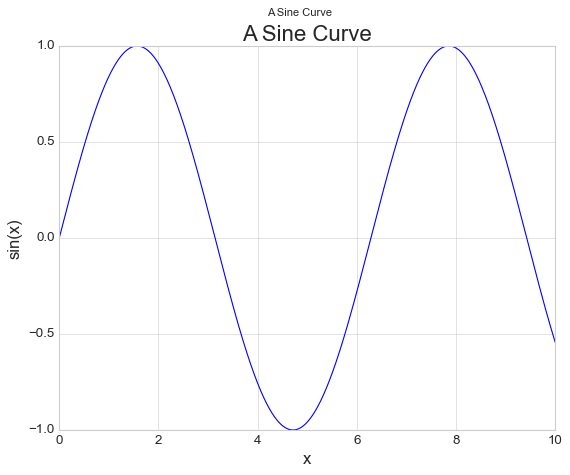

In [84]:
plt.plot(x, np.sin(x))
plt.suptitle("A Sine Curve", size=10)
plt.title("A Sine Curve", size=20)
plt.xlabel("x", size=15)
plt.ylabel("sin(x)", size=15)

추가적인 옵션을 통해서 라벨의 size, font, style등을 모두 바꿀 수 있습니다. 

한 그래프에 여러개의 선이 있다면 이것을 범례로 구분해 주는 것이 좋습니다. 이는 ``plt.legend()`` 를 통해서 구분해줄 수 있습니다.

또한 개개별 plot의 이름은 plot 시점에서 label keyword를 지정해 주는 것으로 설정할 수 있습니다.

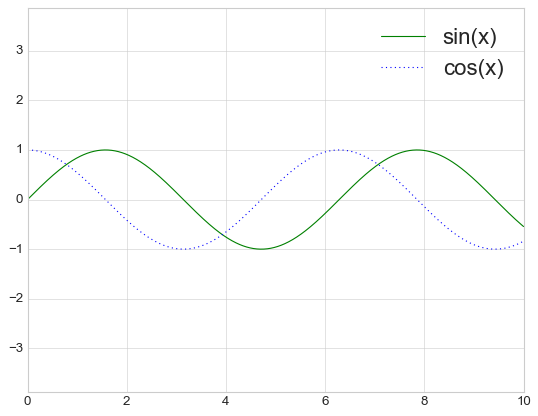

In [88]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend(fontsize=20)
#help(plt.legend)

``plt.legend()`` 는 plot에서 지정한 line style과 color도 같이 보여줍니다. 그래서 <u>어떤 선이 어떤 역할을 하는지를 구분</u>지어 줄 수 있습니다.

## Object oriented way

`plt`의 대부분의 함수는 `ax`의 object oriented 방식으로 그대로 쓸 수 있습니다. 예를 들어 ``plt.plot()`` → ``ax.plot()``나 ``plt.legend()`` → ``ax.legend()`` 같은 것이지요. 

하지만 아래의 함수는 조금 다른 형태를 가집니다. 

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

그리고 ``ax.set()`` 함수를 통해 다양한 것을 한 번에 지정할 수도 있습니다.

[(0.0, 10.0),
 (-2.0, 2.0),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'sin(x)'),
 Text(0.5, 1.0, 'A Simple Plot')]

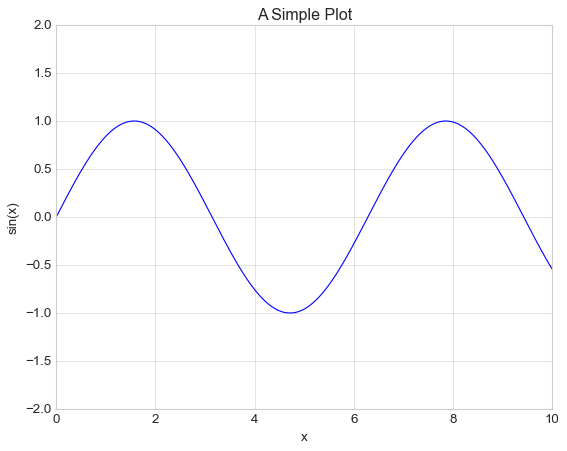

In [89]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2), xlabel='x', ylabel='sin(x)', title='A Simple Plot')

# Simple Scatter Plots

line plot만큼 자주 쓰이는 것이 scatter plot입니다. scatter(산점도) plot은 line plot과 다르게 실제 점 사이에 선으로 이어주지 않고, <u>원래의 데이터 포인트를 그대로 표시</u>해 줍니다. 

## Scatter Plots with ``plt.plot``

``plt.plot``/``ax.plot`` 은 아무런 옵션을 넣어주지 않으면 기본으로 line plot을 그려 줍니다. 하지만 옵션을 통해서 scatter plot을 그리개 할 수 있습니다. 

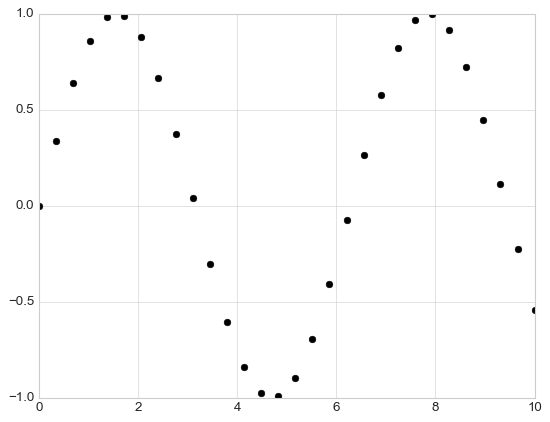

In [92]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'x', color='black')  # 마커 스타일 'x'를 지정함으로써 각 데이터 포인터를 표시

3번쨰 옵션은 marker의 형태를 나타내 주는 character입니다. Line style을 지정해 줄 때 처럼, string code를 통해서 다양한 marker의 종류를 설정해 줄 수 있습니다. 종류가 매우 많지만 아래와 같은 예를 들 수 있는데, 더 많은 것은 matplotlib의 documentation을 참조하세요.

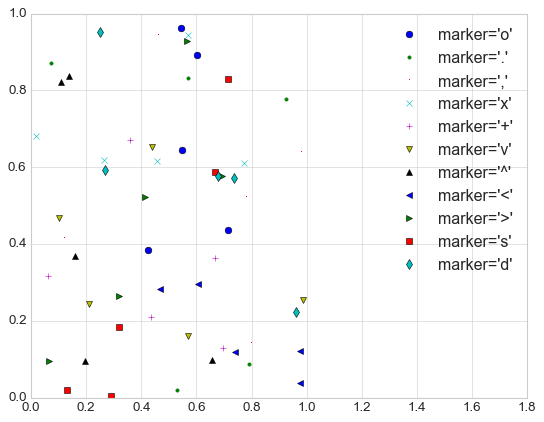

In [29]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

line code와 color code를 같이 넣어주면, marker와 line이 모두 있는 그림을 그릴 수 있습니다.

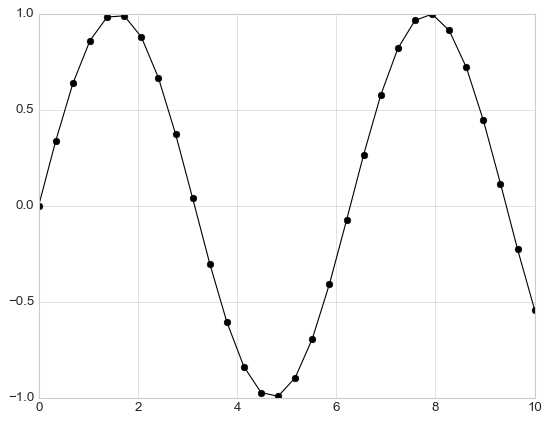

In [97]:
plt.plot(x, y, '-ok')

``plt.plot`` 의 keyword arguments들을 통해서 line과 marker의 다양한 설정을 바꿀 수 있습니다. 

(-1.2, 1.2)

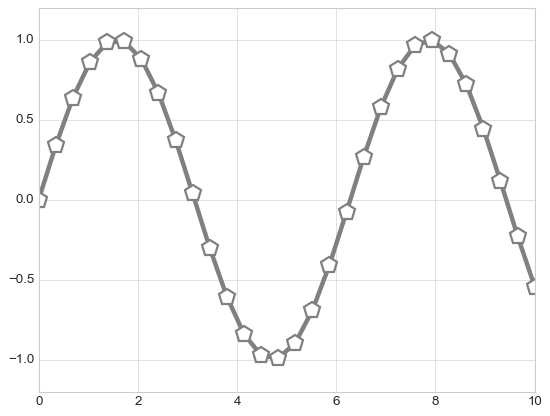

In [103]:
plt.plot(x, y, '-p', color='gray', markersize=15, linewidth=4, 
         markerfacecolor='white', markeredgecolor='gray', markeredgewidth=2)
plt.ylim(-1.2, 1.2)

즉 위의 예들 처럼 `plt.plot`함수를 통해 다양한 시각화 방식을 시도해볼 수  있습니다. 역시나 더 자세한 것은 matplotlib의 documentation을 참조해 주세요.

## Scatter Plots with ``plt.scatter``


Scatter plot을 그리기 위한 조금 더 복잡한 기능들은 ``plt.scatter`` function에 정의되어 있습니다. 사용방법은 `plt.plot`과 유사합니다.

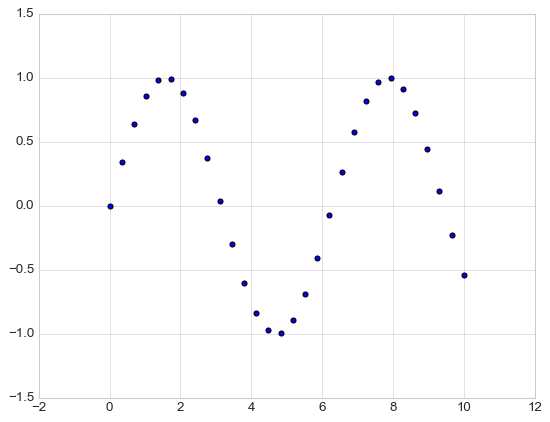

In [104]:
plt.scatter(x, y, marker='o')

``plt.scatter``과 ``plt.plot``의 가장 큰 차이점은 <u>plt.scatter는 개개의 점의 크기, 색상 등을 모두 자유롭게 조정할 수 있다</u>는 것입니다.

예를 들어서 아래의 예처럼 모든 점의 색상과 크기를 다르게 그릴 수 있습니다.
더불어서 `alpha` 키워드를 통해서 점을 반투명하게 설정할 수도 있습니다. 

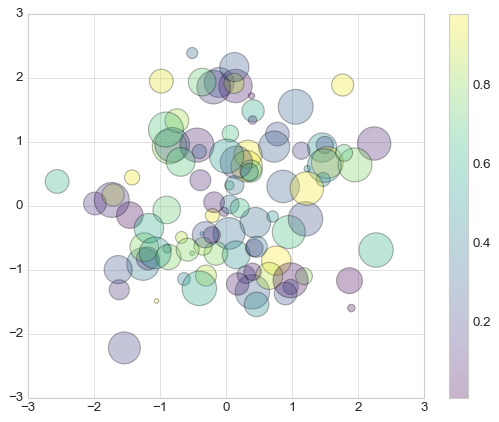

In [106]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();  # show color scale

위의 예에서 color argument는 자동으로 color scale에 맞추어서 변환되고 (`colorbar()` command를 통해서 오른쪽의 colorbar를 만들 수 있습니다). 사이즈의 경우는 픽셀 사이즈로 직접 주어졌다는 것을 알 수 있습니다. 

이러한 방식으로 점의 크기와 색상을 통해 시각화에 더 많은 정보를 담을 수 있습니다. 예를 들어서 2차원 이상의 데이터를 2차원 그림으로 그리고 싶을 떄, 이러한 방식이 유용합니다.

Iris dataset은 1936년에 Ronald Fisher가 3가지 종류의 Iris 꽃들의 꽃받침(sepals)과 꽃잎(petals) 각각의 길이, 너비 4개의 feature로 만든 간단한 분류 데이터입니다. 

x축과 y축은 꽃받침의 길이와 너비, 그리고 color는 3가지 꽃의 종류, 점의 크기는 꽃잎의 너비으로 둔 시각화를 해 봅시다. 

Text(0, 0.5, 'sepal width (cm)')

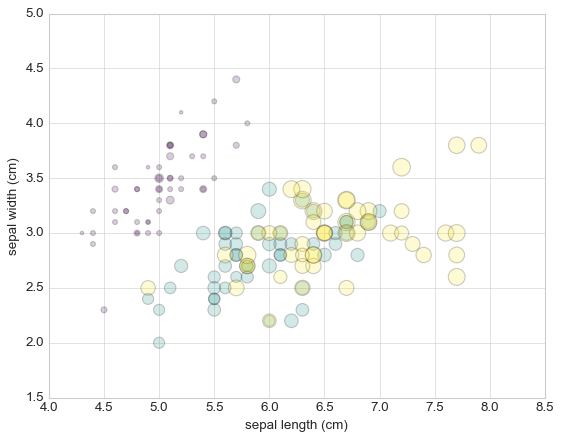

In [108]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

## ``plot`` Versus ``scatter``: A Note on Efficiency

``plt.plot``와 ``plt.scatter``의 기능이 다르지만, 데이터가 커 진다면 어떤 것이 더 효율적일까요? 위와 같은 복합적인 시각화를 시도하려는 것이 아니라면 <u>일반적으로 ``plt.plot``이 ``plt.scatter`` 보다 빠릅니다</u>. 즉, 간단한 경우에는 무조건 ``plt.plot``을 사용하세요.

# Visualizing Errors

데이터를 다룰 때에는 데이터의 대표값과 함께 데이터의 에러값을 같이 다루는 것이 중요합니다. 

이러한 에러를 시각화 하는 방법을 배워보도록 합시다.

## Basic Errorbars

간단한 errorbar는 아래와 같이 ``yerr`` 혹은 ``xerr`` 키워드를 통해 보여줄 수 있습니다.

<ErrorbarContainer object of 3 artists>

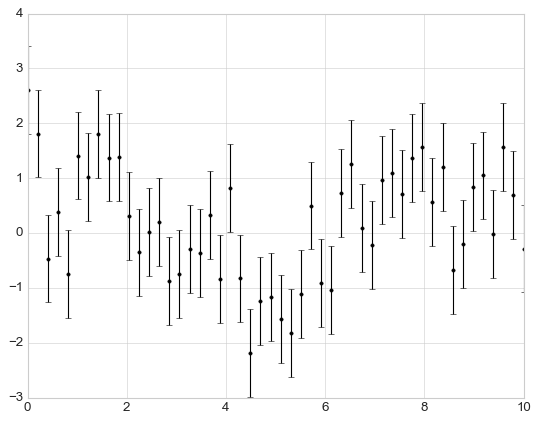

In [140]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k')

여기서 ``fmt`` 는 라인과 점의 형태를 조절해주는 키워드입니다. 위에 `plt.plot`에서 키워드 없이 입력했던 형태와 같은 형태로 입력해주시면 됩니다.

``errorbar``의 형태도 아래와 같이 조정해줄 수 있습니다

<ErrorbarContainer object of 3 artists>

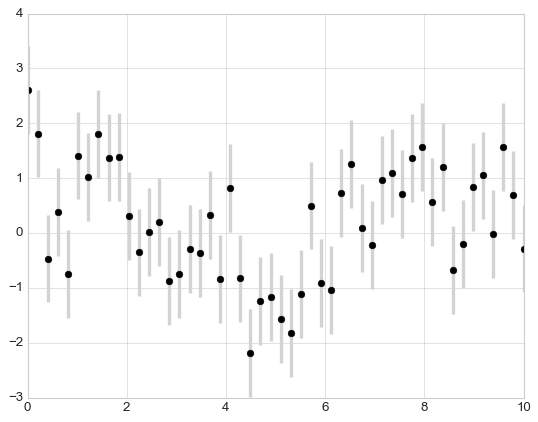

In [141]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)

## Continuous Errors

연속함수의 그래프의 경우는 에러의 경우도 분포에 따른 quantile등으로 주어지는 경우가 많습니다. 예를 들어서 중간값, 상위 25%, 하위 25%을 한 번에 표현하는 것이지요. 이 경우에는 저렇게 errorbar를 그리는 것 보다 ``plt.plot``과 ``plt.fill_between``을 합치는 것이 더 유용한 결과를 내 줍니다. 11주차에 sklearn을 간단히 배울 예정이지만, 일단 그 기능을 가져와 봅시다. Gaussian Process Regressor는 확률론적 예측을 통해서 데이터를 회귀분석 해 줍니다. 그리고 각 위치에 대해서 실제 데이터와의 에러값을 errorbar로 그릴 수 있습니다. 

먼저 아래의 코드를 통해 gaussian regression을 해 봅시다. 

In [112]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x) # lamdba 함수는 배워두면 편리합니다. 입력되는 x 변수에 대해서 값을 계산해준다고 생각해주시면 됩니다.
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)
# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata) 
xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2*MSE  # 2*sigma ~ 95% confidence region

자세한 부분은 생략하고 이제 우리는 ``xfit``, ``yfit``, 그리고 ``dyfit``이라는 3가지 값을 가지고 있습니다. 
위의 값을 ``plt.errorbar`` 를 통해서 그릴 수도 있기는 합니다. 그런데 1000개의 점에 100개의 에러바를 그리는 일이 효과적인 시각화는 아닐 것이 명백합니다. 
 
이런 때는 ``plt.fill_between`` 통해서 연속적인 에러를 표시해 주는 것이 훨씬 좋은 선택입니다.

(0.0, 10.0)

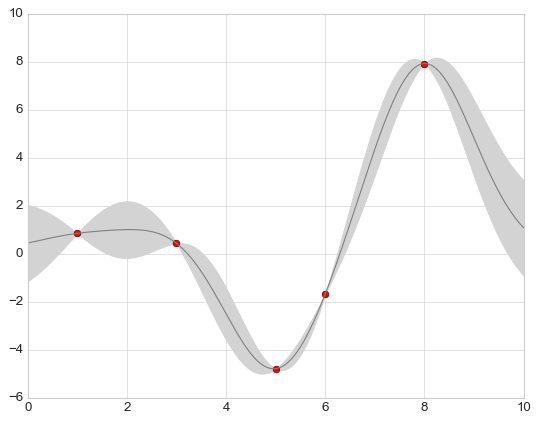

In [146]:
# Visualize the result
plt.plot(xdata, ydata, 'or')

plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='lightgray', alpha=1)

plt.xlim(0, 10)

위에서 보이듯 ``fill_between`` function의 인자는 x value, the lower y-bound, the upper y-bound 순으로 받습니다. 그리고 그 lower bound와 upper bound 사이의 점을 채워줍니다.

이러한 시각화는 나중에 seaborn을 통해 더 쉽게 구현할 수 있습니다. 다음 시간에 배우게 될 것입니다.

# Density and Contour Plots

3차원 시각화는 여러가지 면에서 실제로 정보를 알아보기 힘든 경우가 많습니다. 그래서 많은 경우 3차원 데이터를 2차원에서 countor(등고선) plot을 그리거나, density plot (heatmap)을 그리게 됩니다. 이를 위해서 여러 함수가 있습니다. ``plt.contour`` (contour plots), ``plt.contourf`` (filled contour plots), ``plt.imshow`` (이미지), ``plt.pcolor`` 등이 있습니다. 

## Visualizing a Three-Dimensional Function

일단 간단한 3차원 함수 $z = f(x, y)$ 를 정의해 보겠습니다.

In [114]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

Contour plot은 ``plt.contour`` 을 통해 그릴 수 있습니다.

이 함수는 3개의 인자를 받습니다. x좌표의 grid, y좌표의 grid, 그리고 z값의 grid 입니다. 
x와 y는 점의 위치를 나타내 주고, z 값은 그 좌표에 해당하는 contour level을 의미합니다. 
이러한 데이터를 만들기 가장 쉬운 방법은 ``np.meshgrid`` 함수입니다.

In [148]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [149]:
np.meshgrid(x, y)

(array([[0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        ...,
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ]]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.12820513, 0.12820513, 0.12820513, ..., 0.12820513, 0.12820513,
         0.12820513],
        [0.25641026, 0.25641026, 0.25641026, ..., 0.25641026, 0.25641026,
         0.25641026],
        ...,
        [4.74358974, 4.74358974, 4.74358974, ..., 4.74358974, 4.74358974,
         4.74358974],
        [4.8

가장 단순한 contour plot을 그려 보겠습니다.

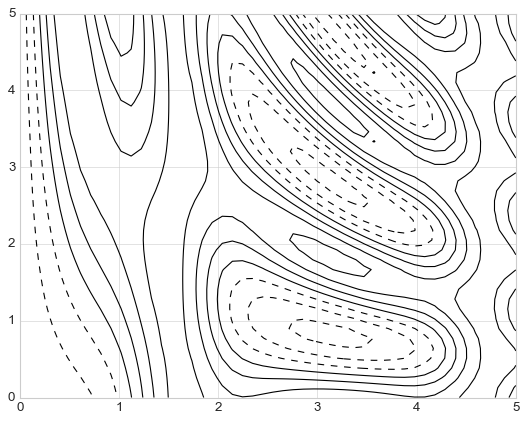

In [151]:
plt.contour(X, Y, Z, colors='black')

이렇게 단색이 인자로 주어지면, <u>음수를 표현하기 위해서 dashed line을 쓰고 실선으로 양수를 표시</u>합니다. 

하지만 이렇게 보면 실제로 각 선이 어느정도 레벨을 나타내는지 알기 어렵지요. 그래서 ``cmap``을 통해 contour line의 색을 변경할 수 있습니다. 

또한 몇 개의 레벨로 contour를 표현할 지도 지정할 수도 있습니다.

아래와 같이 인자를 입력하면, 20개의 균일하게 나누어진 레벨로 contour를 나누라는 뜻입니다.

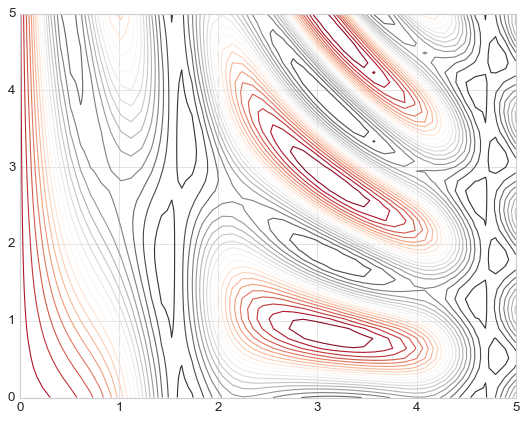

In [152]:
plt.contour(X, Y, Z, 20, cmap='RdGy')

``RdGy`` (*Red-Gray*) colormap은 중간값을 기준으로 붉은색과 흑색을 표현해주는 colormap입니다. 
이외에도 다양한 colormap 이 있습니다. colormap의 리스트를 보고 싶다면 아래의 커맨드를 이용해 보세요.

```
plt.cm.<TAB>
```

하지만 이렇게 점으로만 표현하면 사실 각각의 레벨을 알기 힘든 경우도 많습니다. 
이런 경우에는 ``plt.contourf()``을 통해서 각 contour line의 사이를 색상으로 채워주는 시각화를 해 주면 좋습니다. 

``plt.colorbar()`` 를 추가해서 실제 각 위치의 색상 level이 어떤 숫자를 가리키는지도 알아봅시다. 

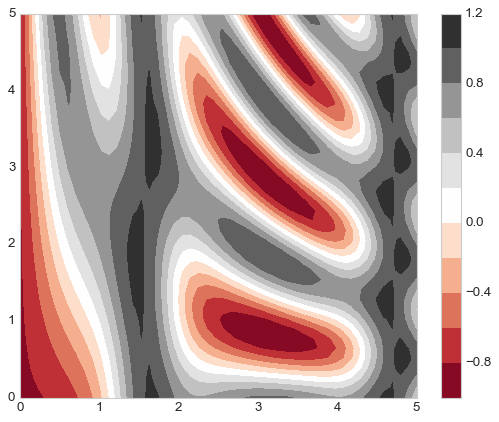

In [153]:
plt.contourf(X, Y, Z, 10, cmap='RdGy')
plt.colorbar()

colorbar를 통해서 훨씬 명확하게 각 위치의 값을 알 수 있습니다. 

또 다른 문제는 contour plot의 경우 colormap이 불연속적이라는 것입니다. 

contour의 레벨 수를 늘릴 수는 있지만, 이런 경우 매우 비효율적이면서 느립니다. 

대신 연속적인 colormap을 위해서 ``plt.imshow()``을 사용해 봅시다.

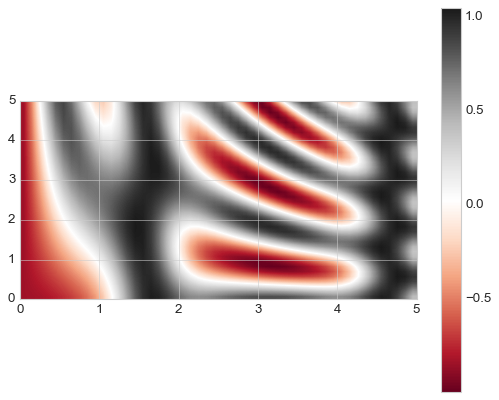

In [154]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', aspect=0.5)
plt.colorbar()

``imshow()``가 grid와 다른 점이 몇가지 있습니다. 

- ``plt.imshow()`` 는 *x* and *y* grid를 인자로 받지 않습니다. 그래서 수동으로 *extent* [*xmin*, *xmax*, *ymin*, *ymax*]를 지정해서 범위를 정해 주어야 합니다. 
- ``plt.imshow()`` 는 좌측 상단의 값을 기준으로 색을 그리게 되어 있습니다. contour는 좌측 하단의 값을 기준으로 그림을 그립니다. 그래서 두 가지를 매칭하려면 `lower` option등을 주어야 합니다. 
- ``plt.imshow()`` 는 axis aspect ratio를 input data에 맞추어 자동으로 조정해 줍니다. ``plt.imshow(aspect=1)`` 등을 넣어서 비율을 조정해줄 수 있습니다.

contour plot과 image plot을 결합하는 것이 때로는 매우 강력한 시각화 효과를 내 줍니다.

예를 들어서 반투명한 색상으로 heatmap을 그리고, 그 위에 contour를 그리는 것입니다.

또한 contour에 `plt.clabel()`을 사용해 level마다 label을 붙여서 각 level의 값도 표현해 줍시다.

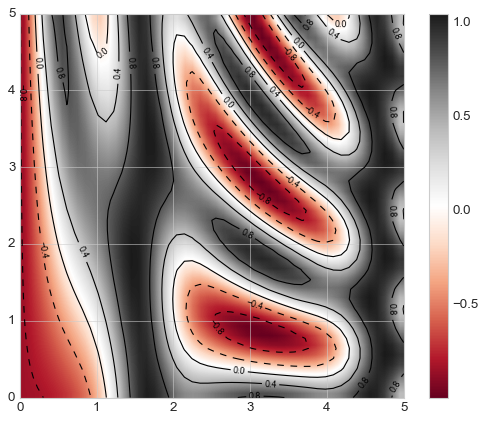

In [155]:
contours = plt.contour(X, Y, Z, 5, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=1)
plt.colorbar()

즉, 위의 3가지를 결합함으로 여러가지 방식으로 다양한 3차원 데이터를 2차원에 표현하는 것이 가능합니다.

이번 수업에서는 시간상의 문제로 3차원 데이터를 직접 plot하는 법을 다루지는 않을 예정입니다만, 나중에 보충 자료등을 올려드릴까 생각중입니다.

# Histograms, Binnings, and Density
histogram은 분포 데이터를 보기 위한 가장 간편하고 좋은 방법 중 하나입니다. 

In [122]:
# 1000개의 표준 정규분포 random data를 만들어 봅시다.
data = np.random.randn(1000)

(array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-4.91158468, -3.89547694, -2.87936919, -1.86326144, -0.8471537 ,
         0.16895405,  1.18506179,  2.20116954,  3.21727728,  4.23338503,
         5.24949277]),
 <a list of 10000 BarContainer objects>)

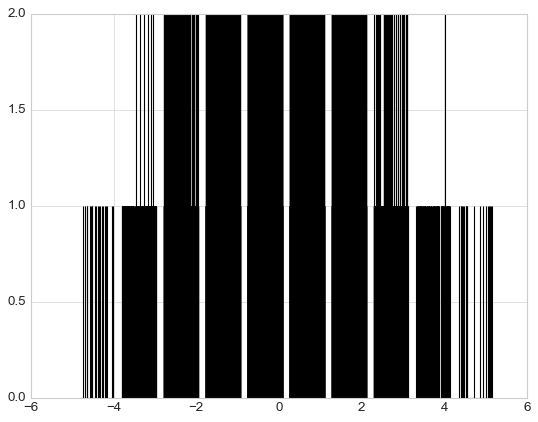

In [156]:
plt.hist(data)

``hist()`` 함수는 histogram을 계산하는 방법과 시각화하는 방법 모두에 대해서 여러가지 함수를 제공합니다.

예를 들어서 아래와 같이 옵션을 줄 수 있습니다.

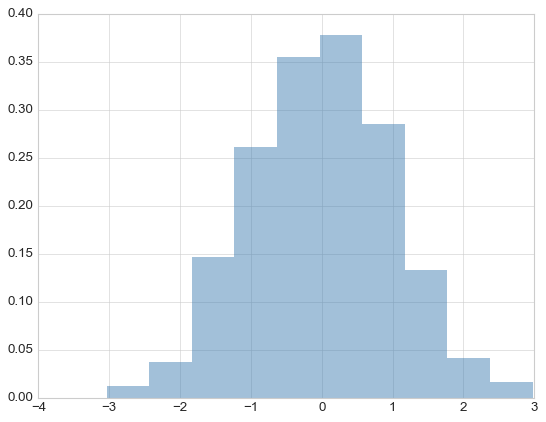

In [124]:
plt.hist(data, bins=10, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')

``help(plt.hist)`` 을 통해서 옵션을 직접 확인해 보세요.
위에 사용했던``histtype='stepfilled'``와 ``alpha``를 결합한다면, 여러 분포를 한 번에 보는 시각화에 유용하게 사용할 수 있습니다.

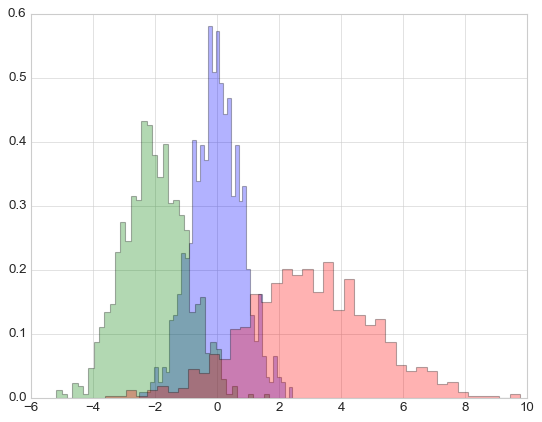

In [125]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

단순히 histogram을 계산하고 싶다면 ``np.histogram()`` 함수를 사용하면 됩니다.

In [126]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 29 245 440 251  35]


## Two-Dimensional Histograms and Binnings

지금까지는 1차원에에서 bar의 높이를 통해서 histogram을 그리는 법을 배웠습니다.
이것과 유사하게 2차원에서도 색상 등을 통한 hishtogram을 그릴 수 있습니다.

2차원 gaussian function을 통해서 random variable을 만들어 보겠습니다.

In [159]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: Two-dimensional histogram

``plt.hist2d`` 함수는 2d histogram을 그리는 가장 단순한 방법입니다.

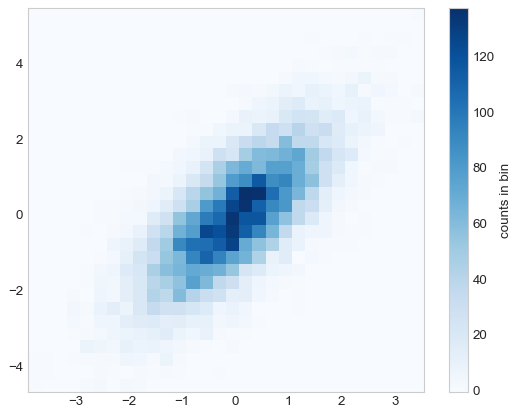

In [162]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

``plt.hist``와 동일하게 ``plt.hist2d``도 여러가지 옵션을 통해 bin size를 조정하거나 histogram의 다양한 옵션을 조정할 수 있습니다.

단순히 2d histogram을 계산하고 싶다면 ``np.histogram2d`` 이라는 함수를 쓰면 됩니다.

In [129]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

더 고차원의 함수에 대해서는 ``np.histogramdd`` function을 사용하시면 됩니다.

### ``plt.hexbin``: Hexagonal binnings

기본적으로 hist2d는 x축과 y축 사이의 사각형 그리드를 만들고, 그 안의 점 수를 세는 방식으로그려집니다.

그런데 때로는 직선보다는 대각선 정보가 더 중요한 경우가 있습니다. 예를 들어서 y = x 의 경우, 직선 점들을 채우게 된다면 끊어진 것 처럼 보이게 될 것입니다. 

그래서 이런 경우를 위해서 ``plt.hexbin``이라는 육각형 grid를 사용하는 함수가 있습니다.

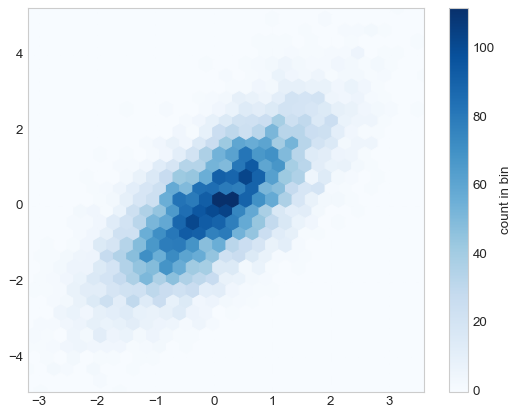

In [130]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### Kernel density estimation

위의 방법들은 점의 수를 직접 세어서 그림을 그려줍니다. *kernel density estimation* (KDE)은 커널 함수를 통해서 매끈하게 다듬어준 분포의 그림을 그리게 해 주는 방법입니다. KDE 자체는 추후에 다룰 기회가 있을 때 이야기하기로 하고, scipy.stats의 kde를 통해 그림을 그려봅시다.

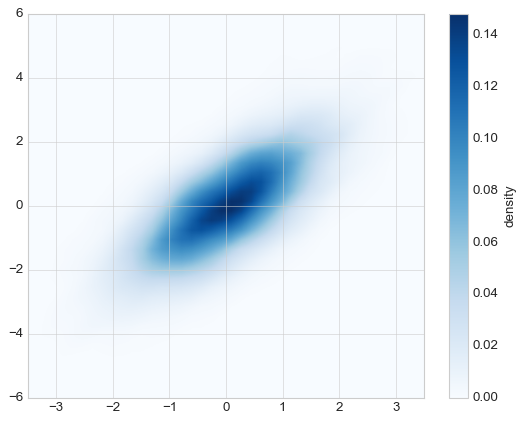

In [131]:
from scipy.stats import gaussian_kde
# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)
# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto',  extent=[-3.5, 3.5, -6, 6], cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

위의 예에서는 ``gaussian_kde``를 사용했습니다. 

이외에도 scipy에는 ``sklearn.neighbors.KernelDensity``, ``statsmodels.nonparametric.kernel_density.KDEMultivariate`` 등을 통해 다른 종류의 kernel을 사용할 수 있습니다.

# Today
- Matplotlb이란 무엇인가
- Line plot
- Scatter plot
- Error bar
- Density plot / Contour plot
- Histogram

# Next class
- Legends
- Colorbars
- Subplot
- Text / Annotation
- Ticks
- Seaborn